# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from charset_normalizer import detect
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,auc

# Reading the Data

In [2]:
with open('c:/raktim/Spam_Detection/spam.csv','rb') as f:
    enc=detect(f.read())

In [3]:
df=pd.read_csv('c:/raktim/Spam_Detection/spam.csv',encoding=enc['encoding'])
df=df[['v1','v2']]
df=df.rename(columns={'v1':'spam','v2':'email'})
df

,spam,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ě_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data analysis & Feature engineering

In [4]:
# there are 5572 samples in our data, lets check if their are any null values in our data
print(df.isnull().any())

spam     False
email    False
dtype: bool


In [5]:
# we see their are no null values in the data hence we move ahead and ....

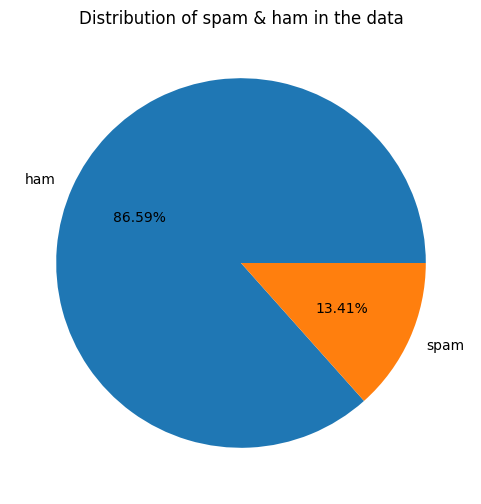

In [6]:
# lets check the distribution of the data
plt.figure(figsize=(6,6))
plt.pie(df['spam'].value_counts(),labels=df['spam'].value_counts().index,autopct='%0.2f%%')
plt.title('Distribution of spam & ham in the data')
plt.show()

In [7]:
print(df['spam'].value_counts())

ham     4825
spam     747
Name: spam, dtype: int64


In [8]:
# we see the clear imbalance in the data but since the data is big enough lets move ahead as of now,
# but we will be keeping a close check on the evaluation metrics to see if due to this our model
# suffers or not, if we observe that the model suffers in predicting the minority class we then will
# go ahead and apply techniques to handle imbalance dataset.

In [9]:
# lets convert our target feature into numeric format.
df['spam']=df['spam'].apply(lambda x: 1 if x=='spam' else 0)

In [10]:
df

,spam,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ě_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
# applying train-test split
x_train,x_test,y_train,y_test=train_test_split(df['email'],df['spam'],
                                               train_size=0.8,test_size=0.2,
                                              random_state=5)

In [12]:
# shape of train and test data
print('x_train shape')
print(x_train.shape)
print('x_test shape')
print(x_test.shape)

x_train shape
(4457,)
x_test shape
(1115,)


In [13]:
# now we are going to use countvectorizer which will convert the text data of x_train into numeric
# data with some very basic text preprocessing and normalization.
count_vect=CountVectorizer(lowercase=True,strip_accents='ascii')
x_train_vect=count_vect.fit_transform(x_train).toarray()

In [14]:
# length of the feature vector for each sample after using countvectorizor
print('Feature vector length for each sample:')
print(len(count_vect.get_feature_names_out()))

print()

# shape of the x_train_vec
print('x_train shape after applying count vectorizer:')
print(x_train_vect.shape)

Feature vector length for each sample:
7860

x_train shape after applying count vectorizer:
(4457, 7860)


In [15]:
# lets repeat the process for test set as well
x_test_vect=count_vect.transform(x_test).toarray()

In [16]:
print('Feature vector length for each sample:')
print(len(count_vect.get_feature_names_out()))

print()

# shape of the x_test_vec
print('x_test shape after applying count vectorizer:')
print(x_test_vect.shape)

Feature vector length for each sample:
7860

x_test shape after applying count vectorizer:
(1115, 7860)


# The Model

In [17]:
# training the data
model=MultinomialNB()
model.fit(x_train_vect,y_train)

MultinomialNB()

# Evaluation Metrics

In [18]:
# accuracy of train and test set
print('Training accuracy:')
print(model.score(x_train_vect,y_train))
print()
print('Testing accuracy:')
print(model.score(x_test_vect,y_test))

Training accuracy:
0.9937177473636976

Testing accuracy:
0.9883408071748879


In [19]:
# predicted data
train_pred=model.predict(x_train_vect)
test_pred=model.predict(x_test_vect)

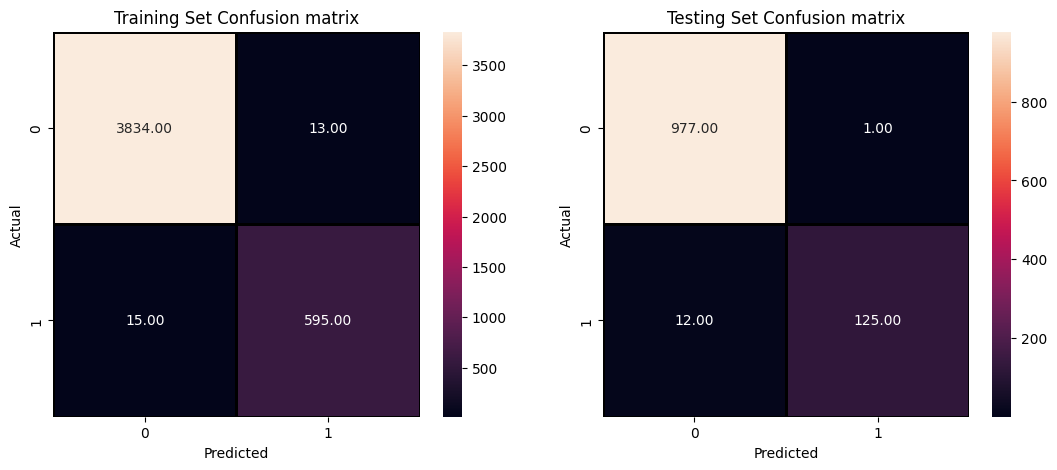

In [20]:
# confusion matrix for train and test set

# training set
cm_train=confusion_matrix(y_train,train_pred)
plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train,cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Training Set Confusion matrix')

# testing set
cm_test=confusion_matrix(y_test,test_pred)
plt.subplot(1,2,2)
sns.heatmap(cm_test,cmap='rocket',annot=True,fmt='0.2f',linewidth=1,linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing Set Confusion matrix')

plt.show()

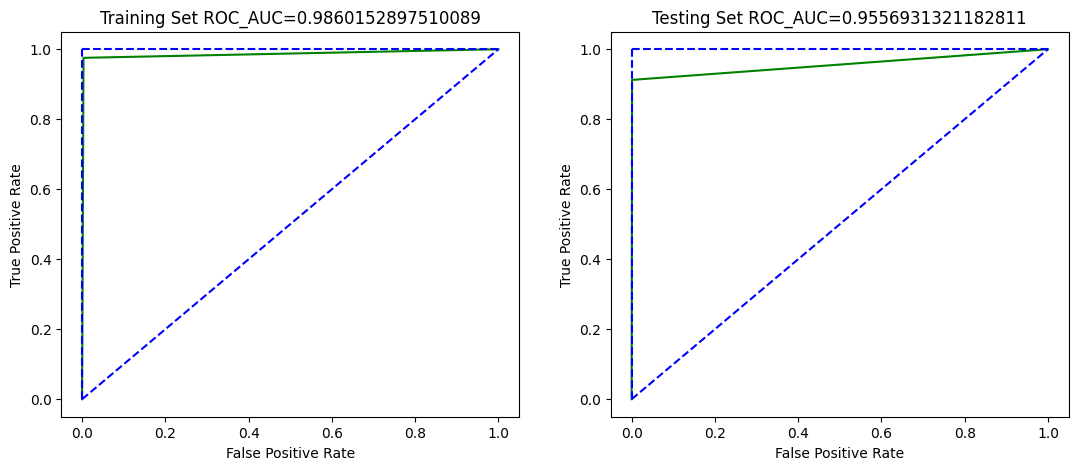

In [21]:
# roc-curve for train and test data

# training set
train_fpr,train_tpr,threshold=roc_curve(y_train,train_pred)
plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(train_fpr,train_tpr,color='green')
plt.plot([0,0],[0,1],color='blue',linestyle='--')
plt.plot([0,1],[1,1],color='blue',linestyle='--')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Training Set ROC_AUC={auc(train_fpr,train_tpr)}')

# testing set
test_fpr,test_tpr,threshold=roc_curve(y_test,test_pred)
plt.subplot(1,2,2)
plt.plot(test_fpr,test_tpr,color='green')
plt.plot([0,0],[0,1],color='blue',linestyle='--')
plt.plot([0,1],[1,1],color='blue',linestyle='--')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Testing Set ROC_AUC={auc(test_fpr,test_tpr)}')

plt.show()

In [22]:
# classification report for training and test set

# training set
print('Training set classification report:')
print(classification_report(y_train,train_pred))

print()

# testing set
print('Testing set classification report:')
print(classification_report(y_test,test_pred))

Training set classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3847
           1       0.98      0.98      0.98       610

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457


Testing set classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       978
           1       0.99      0.91      0.95       137

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [23]:
# pretty great results from the evaluation metrics, hence no need to balance the dataset as the model
# predicts either class with very good performance metrics such as precision, recall, f1-score etc.